In [1]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2

from tqdm import tqdm

from PIL import Image


import sys

sys.path.append("..")

from utils.dcm_utils import *
from utils.nii_utils import *
from utils.train_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = "/Volumes/SSD970/"
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images")
XRAY_IMAGE_DIR = os.path.join(DATA_DIR, "xray_images")

In [32]:
UID = "1.2.826.0.1.3680043.632"

imgs, image_positions, image_orientations, pixel_spacings, slice_thicknesses, is_flip = read_patient_dcm(os.path.join(TRAIN_IMAGE_DIR, UID))
imgs = normalize_hu(imgs)

295
(295, 3)


In [33]:
imgs.min()

0.0

In [34]:
imgs.mean()

0.37036323737408894

center 319.6592075149133


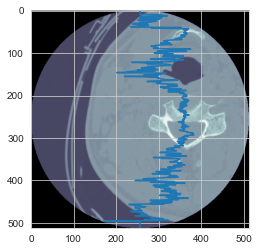

In [48]:
threshold = 0.52
slice_idx = 170

slice = imgs[slice_idx, :, :]

centers = np.zeros(slice.shape[0])
for i, row in enumerate(range(slice.shape[0])):

    idx = np.greater(slice[i, :], threshold).nonzero()
    center = np.mean(idx[0]) if len(idx[0]) > 0 else 256

    centers[i] = center

print(f"center {np.mean(centers)}")

plt.imshow(slice, cmap='bone')
plt.plot(centers, np.arange(slice.shape[0]))


array([0.27765388, 0.28077609, 0.28657449, 0.28635147, 0.27876896,
       0.27430865, 0.26940232, 0.27029438, 0.27185549, 0.27319358,
       0.27430865, 0.27341659, 0.27319358, 0.27386262, 0.27676182,
       0.27698483, 0.27631579, 0.27676182, 0.27564674, 0.27743087,
       0.27520071, 0.27876896, 0.27586976, 0.27096343, 0.26628011,
       0.27029438, 0.27074041, 0.27676182, 0.27564674, 0.28033006,
       0.2778769 , 0.27921499, 0.27899197, 0.27520071, 0.27453167,
       0.27297056, 0.27297056, 0.27319358, 0.27074041, 0.27363961,
       0.27586976, 0.27520071, 0.27475468, 0.27274755, 0.27363961,
       0.27475468, 0.2765388 , 0.28033006, 0.28033006, 0.27408564,
       0.27096343, 0.27252453, 0.26984835, 0.27029438, 0.27252453,
       0.27074041, 0.27230152, 0.27475468, 0.27921499, 0.27743087,
       0.27631579, 0.27274755, 0.27140946, 0.27274755, 0.26962533,
       0.27341659, 0.27698483, 0.2749777 , 0.27319358, 0.27363961,
       0.27520071, 0.28077609, 0.2823372 , 0.28033006, 0.27765